# Zeldovich Approximation 1D

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def whitenoise(N):    
    return np.random.normal(0,1,size=(N))

def removeNaN(ar):
    """Remove infinities and NaNs from an array"""
    ar[ar!=ar]=0
    ar[ar==np.inf]=0

In [3]:
def apply_powerlaw_power_spectrum(f, n=-1.0,min_freq=2.0,max_freq=200.0):
    f_fourier = np.fft.fft(f)
    freqs = np.fft.fftfreq(f.shape[0])
    freqs_2 = np.sqrt(freqs**2)
    f_fourier[freqs_2<min_freq/f.shape[0]]=0
    f_fourier[freqs_2>max_freq/f.shape[0]]=0
    freqs_2**=n
    removeNaN(freqs_2)
    f_fourier*=freqs_2
    return np.fft.ifft(f_fourier).real

In [4]:
def get_potential_gradients(den_real):
    """Starting from a density field in 2D, get the potential gradients i.e.
    returns the two components of grad (grad^-2 den_real)"""
    den = np.fft.fft(den_real)
    freqs = np.fft.fftfreq(den.shape[0])
    del_sq_operator = -(freqs[:]**2)
    grad_x_operator = -1.j*np.fft.fftfreq(den.shape[0])[:]
    phi = den/del_sq_operator
    removeNaN(phi)
    grad_phi_x = grad_x_operator*phi
    grad_phi_x_real = np.fft.ifft(grad_phi_x).real
    return grad_phi_x_real

In [5]:
def evolved_particle_positions(den,time=0.025):
    """Generate a grid of particles, one for each cell of the density field,
    then displace those particles along gradient of potential implied by
    the density field."""
    N = len(den)
    x= np.mgrid[0.:N]
    grad_x = get_potential_gradients(den)
    x+=time*grad_x
    x[x>N]-=N
    x[x<0]+=N
    return x.flatten()

In [6]:
def create_linear_field(resolution=1024):
    return apply_powerlaw_power_spectrum(whitenoise(resolution))

(1024,)


/Users/nramachandra/anaconda3/envs/env_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  import sys
/Users/nramachandra/anaconda3/envs/env_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/nramachandra/anaconda3/envs/env_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


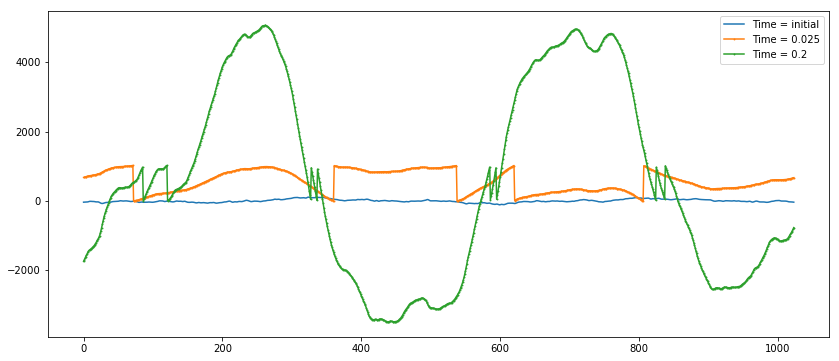

In [7]:
np.random.seed(12)
linear_field = create_linear_field()

t0 = 0.025
x0 = evolved_particle_positions(linear_field, time=t0)
print(linear_field.shape)
plt.figure(21, figsize=(14, 6))
plt.plot(linear_field, label = 'Time = '+ 'initial')
plt.plot(x0, 'o-', ms = 0.9, label = 'Time = '+str(t0))

t1 = 0.2
x1= evolved_particle_positions(linear_field, time=t1)
plt.plot(x1, 'o-', ms = 0.9, label = 'Time = '+str(t1))

plt.legend()
plt.show()


(1024,)


/Users/nramachandra/anaconda3/envs/env_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/nramachandra/anaconda3/envs/env_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


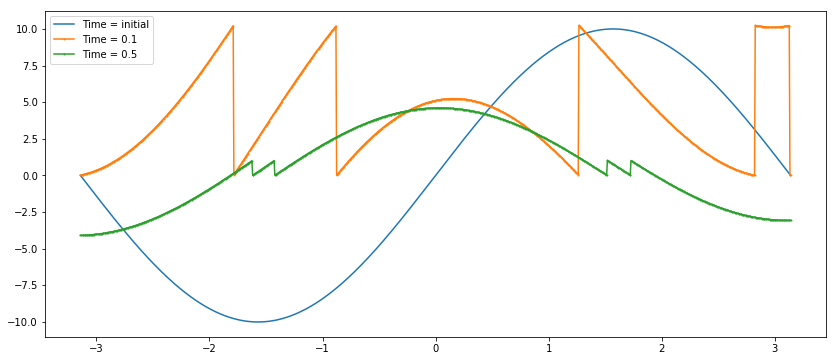

In [9]:
q0 = np.linspace(-1*np.pi, 1*np.pi, 1024)
linear_field = 10*np.sin(q0)
t0 = 0.1
x0 = evolved_particle_positions(linear_field, time=t0)
print(linear_field.shape)
plt.figure(21, figsize=(14, 6))
plt.plot(q0, linear_field, label = 'Time = '+ 'initial')
plt.plot(q0, x0/100, 'o-', ms = 0.9, label = 'Time = '+str(t0))

t1 = 0.5
x1= evolved_particle_positions(linear_field, time=t1)
plt.plot(q0, x1/1000, 'o-', ms = 0.9, label = 'Time = '+str(t1))

plt.legend()
plt.show()